In [82]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [27]:
class Regressor():
    # init methodd initializes all parameters needed to implement regression
    def __init__(self, learning_rate=0.01, tol=0.01, seed=None,normalize=False):
        self.W = None
        self.b = None
        self.__lr = learning_rate
        self.__tol = tol
        self.__length = None
        self.__normalize = normalize
        self.__m = None
        self.__costs = []
        self.__iterations = []
        np.random.seed(seed if seed is not None else np.random.randint(100))
    
    # random initialization of weights and bias
    def __initialize_weights_and_bias(self):
        self.W = np.random.randn(self.__length) #(n,1)
        self.b = 0
    
    # compute the error function: sum of squared errors 
    def __computeCost(self,h,Y):
        loss = np.square(h-Y)
        cost = np.sum(loss)/(2*self.__m)
        return cost
    
    # implement optimization function
    def __optimize(self,X,Y):
        h = np.dot(X,self.W)+self.b
        dW = np.dot( X.T, (h-Y) ) / self.__m
        db = np.sum( h-Y )  / self.__m
        self.W = self.W - self.__lr*dW
        self.b = self.b - self.__lr*db
    
    # normalize the dataset by subtracting the mean and dividing by std deviation
    def __normalizeX(self,X):return (X-self.__mean) / (self.__std)
    
    # fit the model to the dataset: training process
    def fit(self, X, y, verbose=False):
        if self.__normalize:
            self.__mean, self.__std = X.mean(axis=0), X.std(axis=0)
            X = self.__normalizeX(X)
        self.__m,self.__length = X.shape
        self.__initialize_weights_and_bias()
        last_cost,i = float('inf'),0
        while True:
            h = np.dot(X,self.W)+self.b
            cost = self.__computeCost(h,y)
            if verbose: print(f"Iteration: {i}, Cost: {cost:.3f}")
            self.__optimize(X,y)
            if last_cost-cost < self.__tol: break
            else: last_cost,i = cost,i+1
            self.__costs.append(cost)
            self.__iterations.append(i)
    
    # test the model on test data
    def predict(self,X):
        if self.__normalize: X = self.__normalizeX(X)
        return np.dot(X,self.W)+self.b
    
    # plot the iterations vs cost curves
    def plot(self,figsize=(7,5)):
        plt.figure(figsize=figsize)
        plt.plot(self.__iterations,self.__costs,'-.o')
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title("Iterations vs Cost")
        plt.show()
    
    # calculates the accuracy
    def score(self,X,y):
        return 1-(np.sum(((y-self.predict(X))**2))/np.sum((y-np.mean(y))**2))
    
    def weights(self):
        return self.W, self.b


In [83]:
# load the boston housing dataset
from sklearn.datasets import load_boston
data = load_boston()
df=pd.DataFrame(data.data,columns=data.feature_names)

In [84]:
df['Target']=data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [21]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

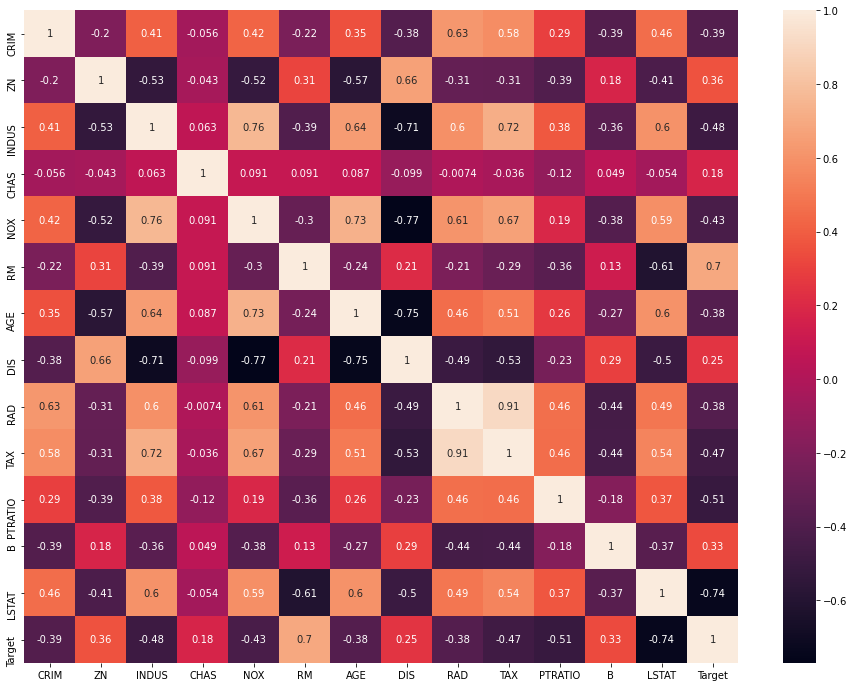

In [86]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True)

X_train:(404, 1)
y_train:(404,)
X_test:(102, 1)
y_test:(102,)
Train Score: 0.07413036080359214
Test Score:  0.10146637200572661


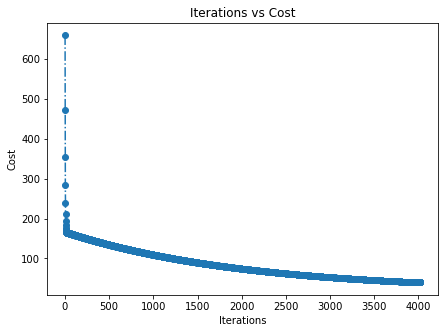

In [79]:
# split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(df.LSTAT.values.reshape(-1,1), df.Target,test_size=0.2)
# print train and test set shapes
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")
print(f"X_test:{X_test.shape}\ny_test:{y_test.shape}")

# normalize the dataset and instantiate Regressor object
regressor = Regressor(learning_rate=0.001,normalize=False)

# call the fit method
regressor.fit(X_train,y_train)

train_score = regressor.score(X_train,y_train)
test_score = regressor.score(X_test,y_test)

print("Train Score:", train_score)
print("Test Score: ",test_score)
regressor.plot()

In [80]:
regressor.weights()

(array([-0.18227903]), 21.806699905460082)

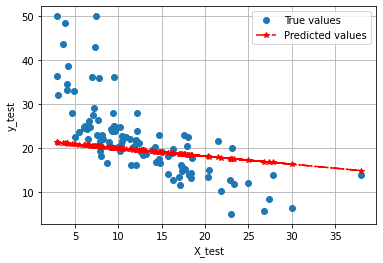

In [81]:
plt.plot(X_test,y_test,'o',label='True values')
plt.plot(X_test,regressor.predict(X_test),'-.r*',label='Predicted values')
plt.xlabel("X_test")
plt.ylabel("y_test")
plt.grid()
plt.legend()

X_train:(404, 13)
y_train:(404,)
X_test:(102, 13)
y_test:(102,)
Train Score: 0.7358787953508892
Test Score:  0.7086251515417437


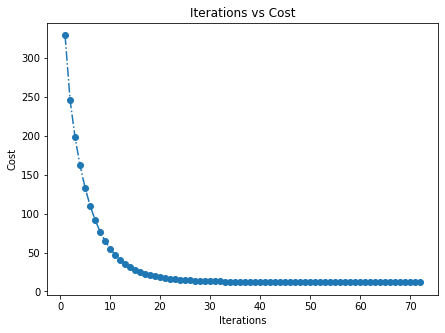

In [42]:
# split the dataset into train and test sets
X_train, X_test, y_train,y_test = train_test_split(data.data, data.target,test_size=0.2)
# print train and test set shapes
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")
print(f"X_test:{X_test.shape}\ny_test:{y_test.shape}")

# normalize the dataset and instantiate Regressor object
regressor = Regressor(learning_rate=0.1,normalize=True)

# call the fit method
regressor.fit(X_train,y_train)

train_score = regressor.score(X_train,y_train)
test_score = regressor.score(X_test,y_test)

print("Train Score:", train_score)
print("Test Score: ",test_score)
regressor.plot()

In [44]:
regressor.weights()

(array([-0.63808723,  0.60584111, -0.20055471,  0.68835577, -1.04505513,
         3.47446346, -0.27260473, -2.20768152,  1.13713123, -0.91042031,
        -1.77750688,  0.88874559, -3.40665035]),
 22.53202994092393)

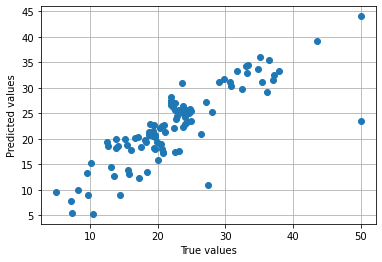

In [43]:
plt.plot(y_test,regressor.predict(X_test),'o')
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.grid()